In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imutils
import easyocr

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\LAPSCART\AppData\Local\Temp\ipykernel_8004\89993799.py:1: SyntaxWarning: invalid escape sequence '\o'
  img = cv2.imread('D:\openCV-project\openCV\Image\car1.jpg')


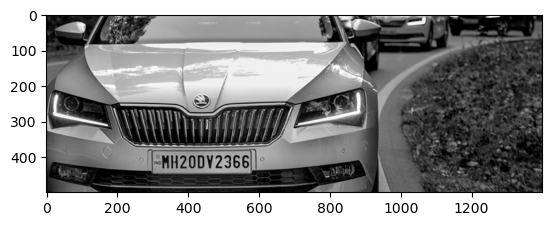

In [4]:
img = cv2.imread('D:\openCV-project\openCV\Image\car1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB)) 

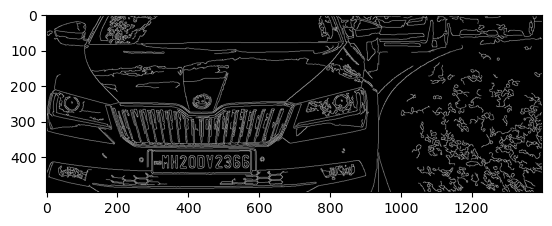

In [5]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) 
edge = cv2.Canny(bfilter,30,200)
plt.imshow(cv2.cvtColor(edge,cv2.COLOR_BGR2RGB))

In [6]:
keypoints = cv2.findContours(edge.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [7]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
    
location

array([[[300, 387]],

       [[303, 445]],

       [[577, 443]],

       [[574, 384]]], dtype=int32)

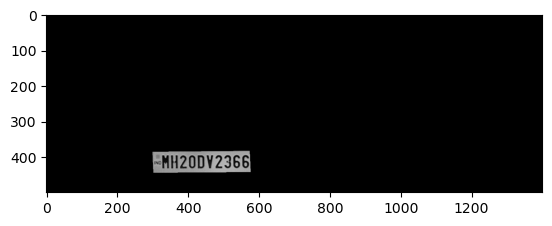

In [8]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

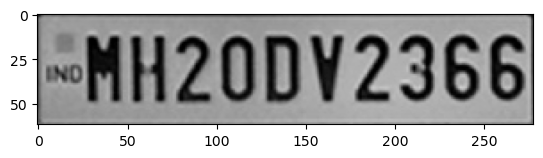

In [9]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

In [10]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[3, 27], [27, 27], [27, 41], [3, 41]], '[4o', 0.07458649779593057),
 ([[18, 2], [278, 2], [278, 57], [18, 57]], "'NHZODV2366", 0.2576972321610003)]

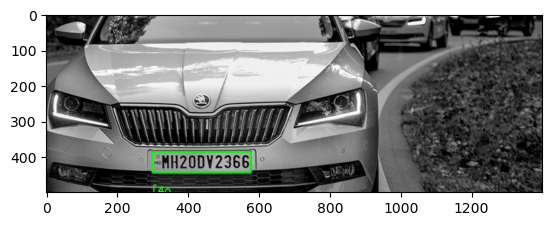

In [11]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))